**Assignment **4**

Gayathri Yenigalla
Harshith Reddy Suram


**Text and sequence**

Two required parameters are passed to Keras while initializing the Embedding layer:
the greatest word index in the dataset plus one, which is the usual definition of the number of potential tokens. The size of the embedding vectors is represented by the dimensionality of the embeddings. For example, you may create an Embedding layer with 1000 potential tokens and 64 dimensions by doing the following:

In [5]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from google.colab import files
import re, os
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

**Model 1 From Scratch**

In [7]:
# The number of terms considered to be qualities
max_features = 10000
#Delete texts with 150 words or less.
maxlen = 150
# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
#preprocessing.sequence.pad_sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [8]:
model = Sequential()

# We set the maximum input length for our Embedding layer.
# in order to subsequently flatten the embedded inputs

model.add(Embedding(10000, 8, input_length=maxlen))

# The 3D tensor of embeddings is flattened.
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# The classifier is added on top.
model.add(Dense(1, activation='sigmoid'))

#assembling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history_1 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 18s 28ms/step - loss: 0.6181 - acc: 0.6727 - val_loss: 0.4532 - val_acc: 0.8200
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3487 - acc: 0.8605 - val_loss: 0.3284 - val_acc: 0.8626
Epoch 3/10
625

This plots training and validation accuracy along with training and validation loss using matplotlib. The first plot shows accuracy, where grey represents training accuracy and blue represents validation accuracy. The second plot displays loss, with grey for training and red for validation.

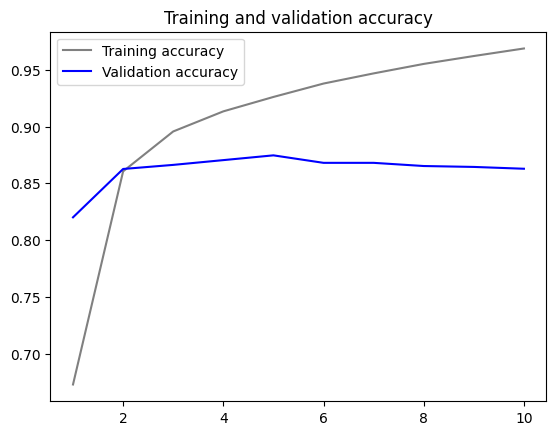

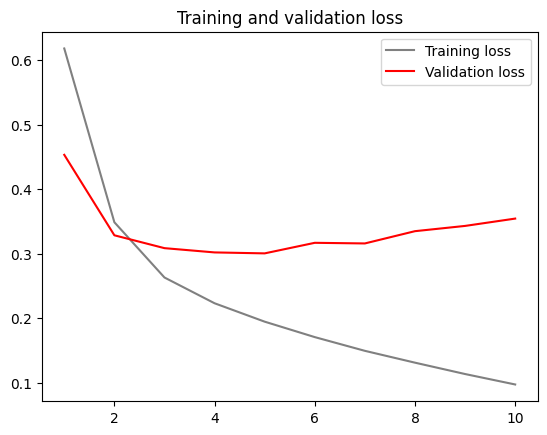

In [9]:
import matplotlib.pyplot as plt

accuracy = history_1.history['acc']
val_accuracy = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 3ms/step - loss: 0.3530 - acc: 0.8617
Test loss: 0.35300153493881226
Test accuracy: 0.8616799712181091


Training for Model 2: 100 samples

In [11]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:100]
y_train = y_train[:100]

In [12]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_2 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 1s 287ms/step - loss: 0.6925 - acc: 0.4875 - val_loss: 0.6926 - val_acc: 0.4000
Epoch 2/10
3/3 [==============================] - 0s 175ms/step - loss: 0.6680 - acc: 0.9250 - val_loss: 0.6936 - val_acc: 0.4000
Epoch 3/10
3/3 [====

This plots training and validation accuracy, along with training and validation loss over epochs. It uses grey for training accuracy, blue for validation accuracy, grey for training loss, and red for validation loss. Finally, both plots are displayed using plt.show().

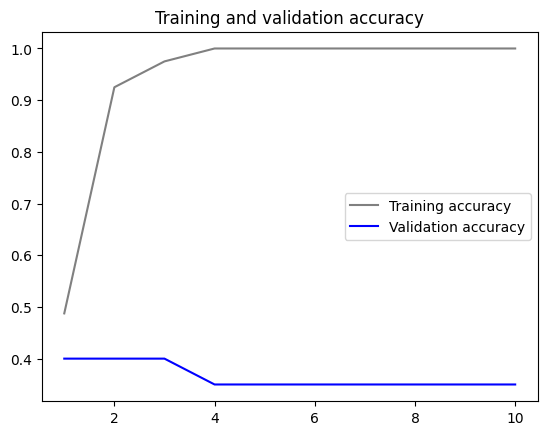

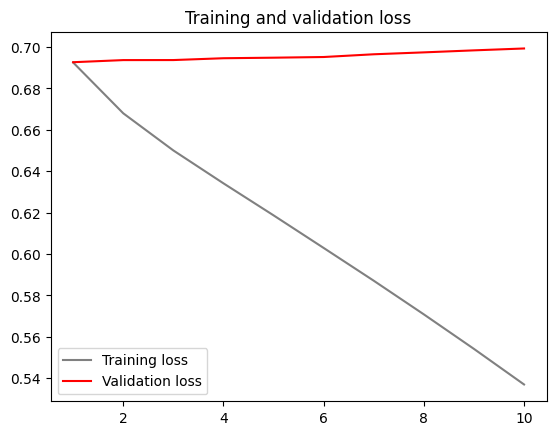

In [13]:
accuracy = history_2.history['acc']
val_accuracy = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.6940 - acc: 0.5006
Test loss: 0.6940385699272156
Test accuracy: 0.5006399750709534


# **Using Pre-Trained word embeddings**

We now adjust the quantity of training samples to ascertain the point at which the embedding layer performs better.

Get the IMDB data in raw text format.

Model 3: Pre-trained model with 100 samples for training

In [16]:
content = "/content/IMDB-Movie-Data.csv"

In [17]:
import os

In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  14.2M      0  0:00:05  0:00:05 --:--:-- 18.8M


In [31]:
imdb_dir = "/content/aclImdb"

In [32]:
train_dir = os.path.join(imdb_dir, 'train')

In [33]:
labels = []
texts = []

In [34]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


**Tokenizing the data**

In [35]:
maxlen = 150  #Reviews will be trimmed after 100 words.
training_samples = 100 # 100 samples will be used for our training.
validation_samples = 10000  # We'll be using 10,000 samples for validation.
max_words = 10000  # Only the top 10,000 terms in the dataset will be taken into account.

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


# Divide the data into two sets: a validation set and a training set.
# However, since we began with data, first shuffle the data.
# in which the samples are arranged (all positive samples come first, followed by all negative samples). provide in a single paragraph
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Get the GloVe word embeddings here.

Processing the embeddings beforehand

In [37]:
import numpy as np
import os

# Define the directory containing the GloVe embeddings
glove_file = "/content/glove.6B.100d.txt"

In [38]:
# Define the directory containing the GloVe embeddings
glove_file = "/content/glove.6B.100d.txt"

# Load the pre-trained word embeddings
embeddings_index = {}
with open(glove_file, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:
            print(f"Issue with word: {word}. Skipping...")
            continue

print('Found %s word vectors.' % len(embeddings_index))

Issue with word: altham. Skipping...
Found 169139 word vectors.


In [39]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # All-zero words are those that cannot be located in the embedding index.
            embedding_matrix[i] = embedding_vector

Building the model

In [40]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1017057 (3.88 MB)
Trainable params: 1017057 (3.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Loading the GloVe embeddings in the model**

In [41]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [42]:
print("Training data shape:", y_train.shape)

Training data shape: (100,)


Train and evaluate

In [43]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_3 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.3a')

Epoch 1/10
4/4 [==============================] - 4s 590ms/step - loss: 0.7185 - acc: 0.4800 - val_loss: 0.6998 - val_acc: 0.4940
Epoch 2/10
4/4 [==============================] - 1s 388ms/step - loss: 0.6831 - acc: 0.5900 - val_loss: 0.7018 - val_acc: 0.4925
Epoch 3/10
4/4 [==============================] - 3s 864ms/step - loss: 0.6613 - acc: 0.6400 - val_loss: 0.7226 - val_acc: 0.5007
Epoch 4/10
4/4 [==============================] - 3s 873ms/step - loss: 0.6561 - acc: 0.6000 - val_loss: 0.7002 - val_acc: 0.5113
Epoch 5/10
4/4 [==============================] - 1s 390ms/step - loss: 0.6391 - acc: 0.6900 - val_loss: 0.6996 - val_acc: 0.5101
Epoch 6/10
4/4 [==============================] - 1s 400ms/step - loss: 0.6278 - acc: 0.6800 - val_loss: 0.7001 - val_acc: 0.5128
Epoch 7/10
4/4 [==============================] - 1s 402ms/step - loss: 0.6127 - acc: 0.7300 - val_loss: 0.7313 - val_acc: 0.5045
Epoch 8/10
4/4 [==============================] - 1s 437ms/step - loss: 0.6075 - acc: 0.72

This visualizes the training and validation accuracy, and loss over epochs using matplotlib. It extracts accuracy and loss values from history_3, plots them separately for training and validation, and displays the plots with corresponding labels.







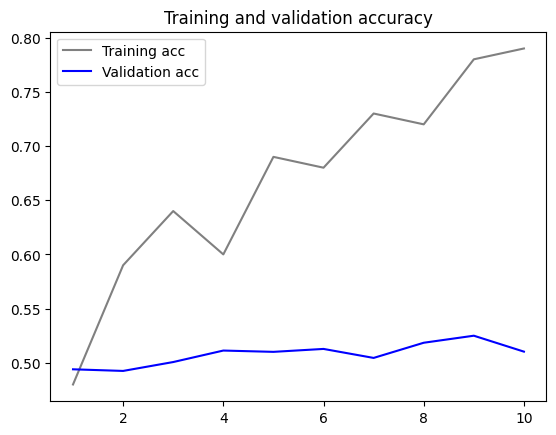

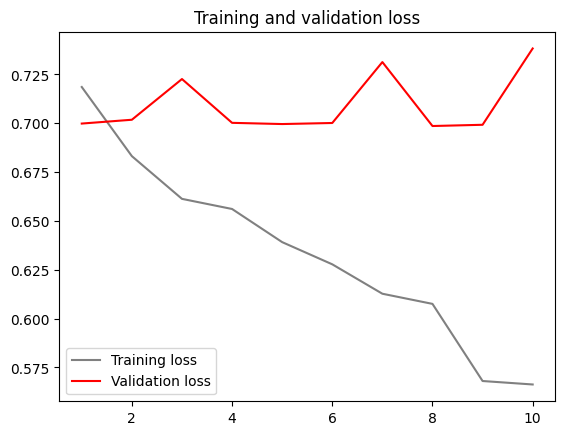

In [44]:
import matplotlib.pyplot as plt

acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'grey', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [46]:
model.load_weights('pre_trained_glove_model.3a')
model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.7350 - acc: 0.5130


[0.7349625825881958, 0.5129600167274475]

We now adjust the quantity of training samples to ascertain the point at which the embedding layer performs better.

**Model 4 training sample size - 1000 using embedding layer**

In [47]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [48]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_4 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 4s 131ms/step - loss: 0.6931 - acc: 0.5150 - val_loss: 0.6923 - val_acc: 0.5200
Epoch 2/10
25/25 [==============================] - 3s 110ms/step - loss: 0.6760 - acc: 0.7812 - val_loss: 0.6917 - val_acc: 0.5200
Epoch 3/10
25/25

This visualizes training and validation accuracy, as well as training and validation loss over epochs using Matplotlib. It plots training and validation accuracy separately, with grey for training and blue for validation, and similarly for training and validation loss with grey and red respectively, then displays both plots.

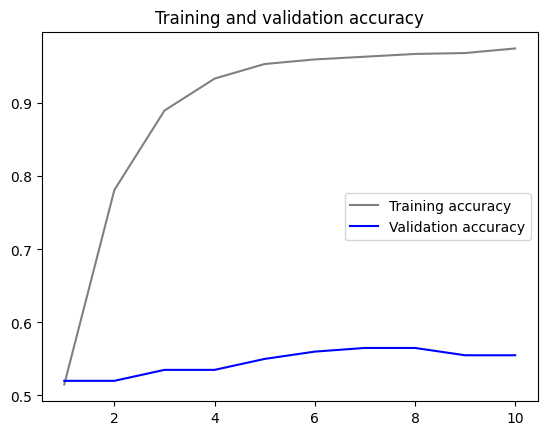

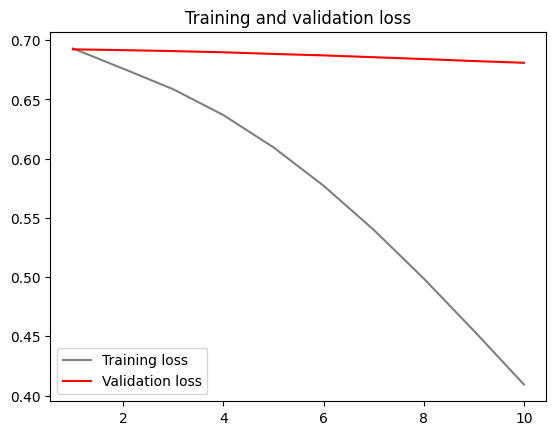

In [49]:
accuracy = history_4.history['acc']
val_accuracy = history_4.history['val_acc']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 3ms/step - loss: 0.6798 - acc: 0.5645
Test loss: 0.6798288822174072
Test accuracy: 0.564520001411438


**Model 5 Taining sample - 15000 using both embedding layer and Conv1D**

In [51]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:15000]
y_train = y_train[:15000]

In [52]:
model = Sequential()
model.add(Embedding(10000, 10, input_length=maxlen))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_5 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 10)           100000    
                                                                 
 conv1d (Conv1D)             (None, 148, 512)          15872     
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 512)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 256)          

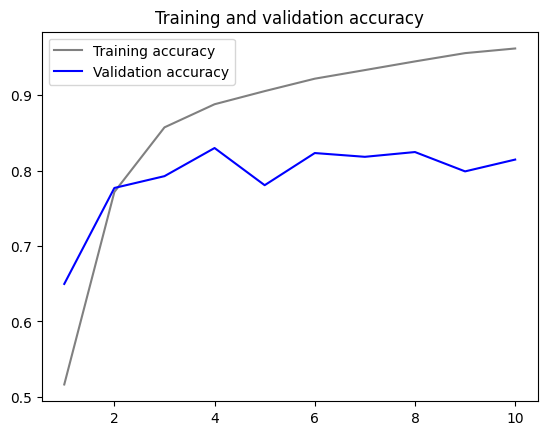

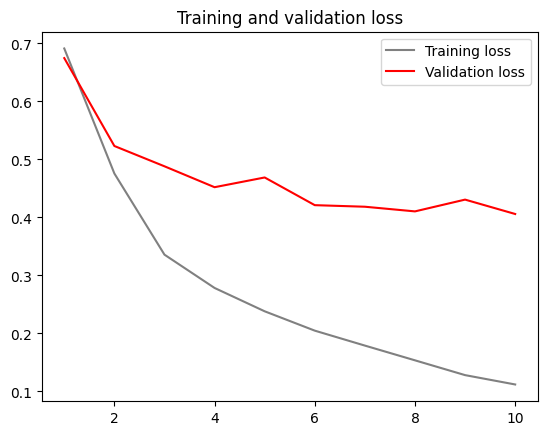

In [53]:
accuracy = history_5.history['acc']
val_accuracy = history_5.history['val_acc']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 3s 4ms/step - loss: 0.4239 - acc: 0.8036
Test loss: 0.4238857924938202
Test accuracy: 0.8035600185394287


As we've seen, the accuracy was still low in the prior model even after increasing the training sample size. However, when we combined Con1D with the larger training sample size, the accuracy rose to 81%.

Model 6 Training sample 30000 with Conv1D and embedding layers

In [55]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:30000]
y_train = y_train[:30000]

In [56]:
model = Sequential()
model.add(Embedding(10000, 12, input_length=maxlen))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_6 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 12)           120000    
                                                                 
 conv1d_3 (Conv1D)           (None, 148, 512)          18944     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 49, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 15, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 256)          

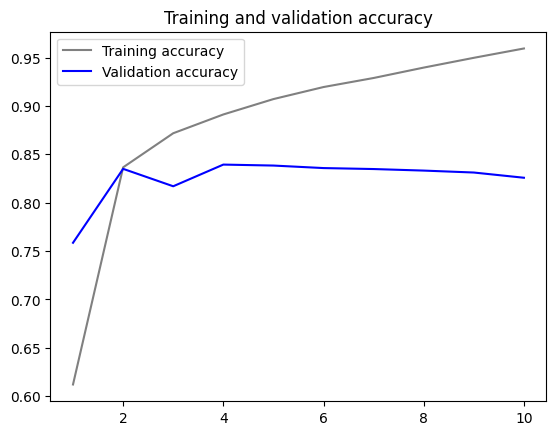

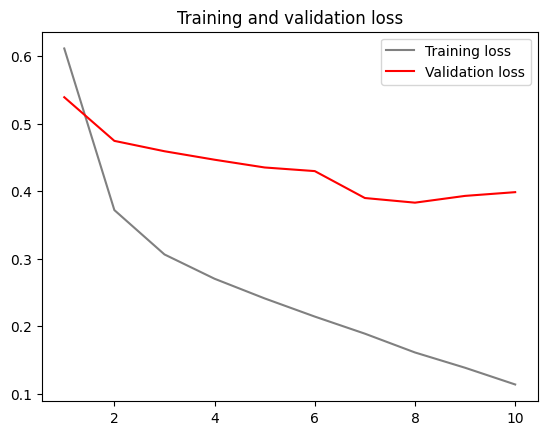

In [57]:
accuracy = history_6.history['acc']
val_accuracy = history_6.history['val_acc']
loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 4s 5ms/step - loss: 0.4031 - acc: 0.8184
Test loss: 0.4030909836292267
Test accuracy: 0.8184000253677368


**Model 7 pretrained model. Training - 15000 samples**

In [61]:
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Define the directory containing the IMDb dataset
imdb_dir = '/content/aclImdb'

texts = []
labels = []

# Load the IMDb dataset
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(imdb_dir, 'train', label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

# Define parameters for tokenization and padding
maxlen = 150
training_samples = 15000
validation_samples = 10000
max_words = 10000

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Pad sequences to ensure uniform length
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Shuffle the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Split the data into training and validation sets
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [62]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 32)                17024     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1017057 (3.88 MB)
Trainable params: 1017057 (3.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [64]:
print("Training data shape:", y_train.shape)

Training data shape: (15000,)


In [65]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_7 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.7a')

Epoch 1/10
469/469 [==============================] - 8s 11ms/step - loss: 0.5950 - acc: 0.6823 - val_loss: 0.4955 - val_acc: 0.7717
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.4811 - acc: 0.7738 - val_loss: 0.4466 - val_acc: 0.7962
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.4165 - acc: 0.8132 - val_loss: 0.4107 - val_acc: 0.8113
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3841 - acc: 0.8294 - val_loss: 0.3961 - val_acc: 0.8209
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3555 - acc: 0.8462 - val_loss: 0.3717 - val_acc: 0.8344
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3336 - acc: 0.8550 - val_loss: 0.3686 - val_acc: 0.8418
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3165 - acc: 0.8683 - val_loss: 0.3606 - val_acc: 0.8448
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - 

In [66]:
model.load_weights('pre_trained_glove_model.7a')
model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 1.0577 - acc: 0.4964


[1.0577056407928467, 0.49636000394821167]

Pre Trained model with 30,000 samples


In [67]:
maxlen = 150  #Reviews will be trimmed after 100 words.
training_samples = 30000 # We'll be using 30,000 samples for training.
validation_samples = 10000  # We'll be using 10,000 samples for validation.
max_words = 10000  # Only the top 10,000 terms in the dataset will be taken into account.

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Divide the data into two sets: a validation set and a training set.
# However, since we began with data, first shuffle the data.
# in which the samples are arranged (all positive samples come first, followed by all negative samples).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:30000]
y_train = labels[:30000]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [68]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(128))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [69]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [70]:
print("Training data shape:", y_train.shape)

Training data shape: (25000,)


In [72]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

maxlen = 150  # Cut texts after 150 words
training_samples = 15000  # Train on 15000 samples
validation_samples = 10000  # Validate on 10000 samples
max_words = 10000  # Consider only the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

# Define the model
model = Sequential()
model.add(Embedding(max_words, 64))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

# Save the model weights
model.save_weights('pre_trained_glove_model.8a')

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 64)          640000    
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 652449 (2.49 MB)
Trainable params: 652449 (2.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 32s 65ms/step - loss: 0.6935 - acc: 0.4986 - val_loss: 0.6936 - val_acc: 0.4934
Epoch 2/10
469/469 [==============================] - 

In [73]:
model.load_weights('pre_trained_glove_model.8a')
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 1.3654 - acc: 0.5095


[1.365393877029419, 0.5094799995422363]